In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/slooze-challenge/slooze_challenge/InvoicePurchases12312016.csv
/kaggle/input/slooze-challenge/slooze_challenge/EndInvFINAL12312016.csv
/kaggle/input/slooze-challenge/slooze_challenge/SalesFINAL12312016.csv
/kaggle/input/slooze-challenge/slooze_challenge/BegInvFINAL12312016.csv
/kaggle/input/slooze-challenge/slooze_challenge/2017PurchasePricesDec.csv
/kaggle/input/slooze-challenge/slooze_challenge/PurchasesFINAL12312016.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
invoice_df=pd.read_csv('/kaggle/input/slooze-challenge/slooze_challenge/InvoicePurchases12312016.csv')
end_invoice=pd.read_csv('/kaggle/input/slooze-challenge/slooze_challenge/EndInvFINAL12312016.csv')
start_invoice=pd.read_csv('/kaggle/input/slooze-challenge/slooze_challenge/BegInvFINAL12312016.csv')
final_purchase=pd.read_csv('/kaggle/input/slooze-challenge/slooze_challenge/PurchasesFINAL12312016.csv')
sales_df=pd.read_csv('/kaggle/input/slooze-challenge/slooze_challenge/SalesFINAL12312016.csv')
purchase_df=pd.read_csv('/kaggle/input/slooze-challenge/slooze_challenge/2017PurchasePricesDec.csv')

In [4]:
all_dataset=[final_purchase.sample(100000),
             purchase_df.sample(12261),
             start_invoice.sample(100000),
             end_invoice.sample(100000),
             sales_df.sample(100000),
             invoice_df.sample(5500)]
# for data_set in all_dataset:
#     print(data_set.head())
all_dataset[4].head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
350,1_HARDERSFIELD_1135,1,1135,Rebel Reserve Bourbon,750mL,1,20.99,20.99,1/17/2016,750,1,0.79,8352,LUXCO INC
327589,38_GOULCREST_26236,38,26236,Marques de Caceres Rose,750mL,1,8.99,8.99,1/17/2016,750,2,0.11,1587,VINEYARD BRANDS INC
4849,1_HARDERSFIELD_2468,1,2468,Crown Royal Nrth Harvest Rye,750mL,1,29.99,29.99,1/8/2016,750,1,0.79,3960,DIAGEO NORTH AMERICA INC
744734,69_MOUNTMEND_42462,69,42462,Gnarly Head Old Vine Znfdl,750mL,2,25.98,12.99,1/8/2016,750,2,0.22,2242,DELICATO VINEYARDS INC
302306,34_PITMERDEN_8897,34,8897,Moet & Chandon Brut Imprl Ro,750mL,2,99.98,49.99,1/2/2016,750,2,0.22,8112,MOET HENNESSY USA INC


## Data preprocessing

In [5]:
def data_prerprocessing_steps(df):
    null_values=df.isna().sum()
    print(null_values ,'\n')
    duplicated_values=df.duplicated().sum()
    print(f'The dataset contains {duplicated_values} duplicated values \n')
    print(f'The data set contains {df.shape[0]} values and {df.shape[1]} columns \n')
    print('*'*50)
    print(df.info())
    print(f'----- After drop the null value-----')
    drop_null=df.dropna(axis=1,inplace=True)
    print(drop_null)

all_dataset=[final_purchase,purchase_df,start_invoice,end_invoice,sales_df,invoice_df]
for data in all_dataset:
    data_prerprocessing_steps(data)

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64 

The dataset contains 0 duplicated values 

The data set contains 2372474 values and 16 columns 

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object

In [6]:
#Let's combine the two dataframes  
fully_invoice_df=start_invoice.merge(end_invoice,on='InventoryId',how='left')
fully_invoice_df.head()

,InventoryId,Store_x,City,Brand_x,Description_x,Size_x,onHand_x,Price_x,startDate,Store_y,Brand_y,Description_y,Size_y,onHand_y,Price_y,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01,1.0,58.0,Gekkeikan Black & Gold Sake,750mL,11.0,12.99,2016-12-31
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01,1.0,62.0,Herradura Silver Tequila,750mL,7.0,36.99,2016-12-31
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01,1.0,63.0,Herradura Reposado Tequila,750mL,7.0,38.99,2016-12-31
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01,1.0,72.0,No. 3 London Dry Gin,750mL,4.0,34.99,2016-12-31


In [7]:
def fill_null_values(df):
    for col in df.columns:
        df[col]=df[col].ffill()
    return df
def round_the_values(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col]=df[col].round(0).astype(int)
    return df
def fill_values_mean(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col]=df[col].fillna(df[col].mean())
    return df
# fully_invoice_df['onHand_y']=fully_invoice_df['onHand_y'].fillna(fully_invoice_df['onHand_y'].mean())
# fully_invoice_df['Price_y']=fully_invoice_df['Price_y'].fillna(fully_invoice_df['Price_y'].mean())
# Forward fill categorical columns
fully_invoice_df[['Store_y','Brand_y','Description_y','Size_y','endDate']]=fill_null_values(fully_invoice_df[['Store_y','Brand_y','Description_y','Size_y','endDate']])
# mean values fill 
# Fill mean only for numeric columns
fully_invoice_df[['onHand_y','Price_y']]=fill_values_mean(fully_invoice_df[['onHand_y','Price_y']])
# Round only numeric values
fully_invoice_df[['onHand_y','Price_y','Store_y','Brand_y']]=round_the_values(fully_invoice_df[['onHand_y','Price_y','Store_y','Brand_y']])
fully_invoice_df.head()

,InventoryId,Store_x,City,Brand_x,Description_x,Size_x,onHand_x,Price_x,startDate,Store_y,Brand_y,Description_y,Size_y,onHand_y,Price_y,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01,1,58,Gekkeikan Black & Gold Sake,750mL,11,13,2016-12-31
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01,1,58,Gekkeikan Black & Gold Sake,750mL,23,22,2016-12-31
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01,1,62,Herradura Silver Tequila,750mL,7,37,2016-12-31
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01,1,63,Herradura Reposado Tequila,750mL,7,39,2016-12-31
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01,1,72,No. 3 London Dry Gin,750mL,4,35,2016-12-31


# 📊📈 Explore Data Analysis:
### Basic data insight using bar and line charts.
* Identify the top vendor along with their profits and revenues using a bar graph. 

* Additionally, utilize a line chart to analyze the information related to pods, invoices, orders, and payments. 

* Moreover, represent the class information using pie charts. 

* Finally, determine the top 10 vendors who received orders, and calculate the time it took for them to make payments after receiving the orders

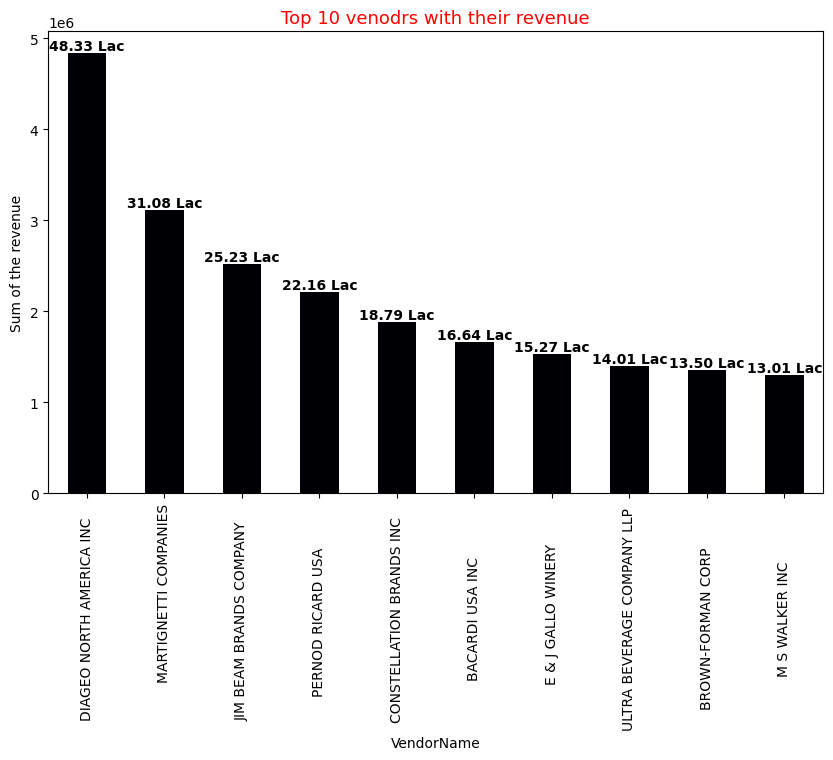

In [8]:
#Top 10 vendors in the sales data
plt.figure(figsize=(10,6))

# find the top 10 vendor names with their revenues using the groupby function
ax=sales_df.groupby('VendorName')['SalesDollars'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='magma')

# get the label in lac format
value=[p.get_height() for p in ax.patches]
ax.bar_label(ax.containers[0],labels=[f'{v/100000:.2f} Lac'for v in value],fontsize=10,fontweight='bold')
ax.set_title('Top 10 venodrs with their revenue',fontsize=13,color='red')
ax.set_xlabel('VendorName')
ax.set_ylabel('Sum of the revenue')
plt.show()

#### Top-10 selling products with their revenue.

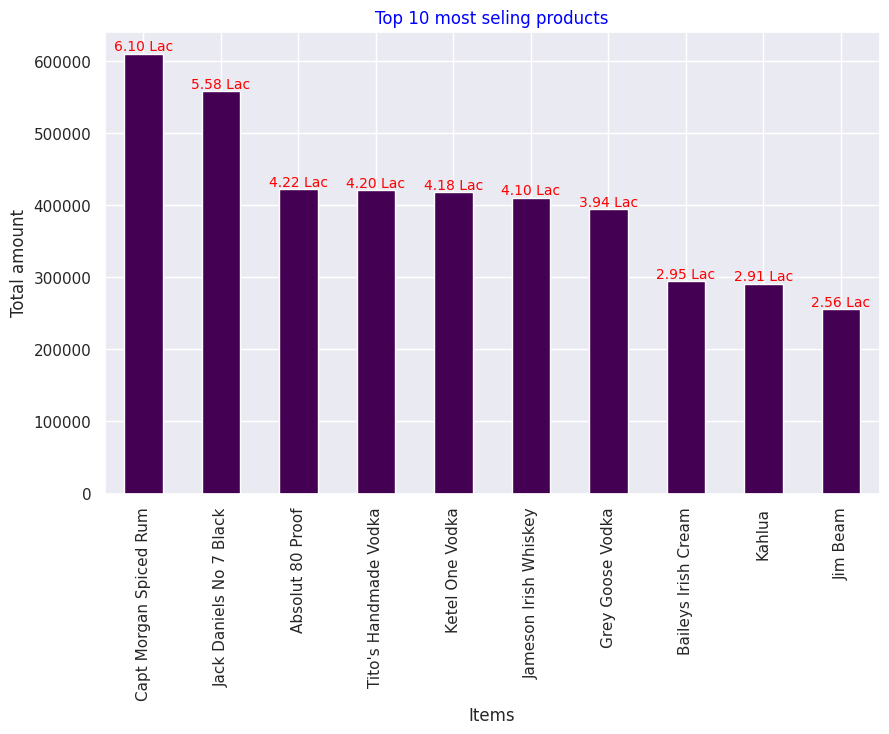

In [9]:
#Set the background theme
sns.set_theme(style='darkgrid')

# define the figuresize
plt.figure(figsize=(10,6))

# Calculate the top-10 products with their revenue
ax=sales_df.groupby('Description')['SalesDollars'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='viridis')

# get the label axes in lac format
value=[p.get_height() for p in ax.patches]
ax.bar_label(ax.containers[0],labels=[f'{val/100000 :.2f} Lac' for val in value],fontsize=10,color='red')
ax.set_title('Top 10 most seling products',fontsize=12,color='blue')
ax.set_xlabel('Items')
ax.set_ylabel('Total amount')
plt.show()

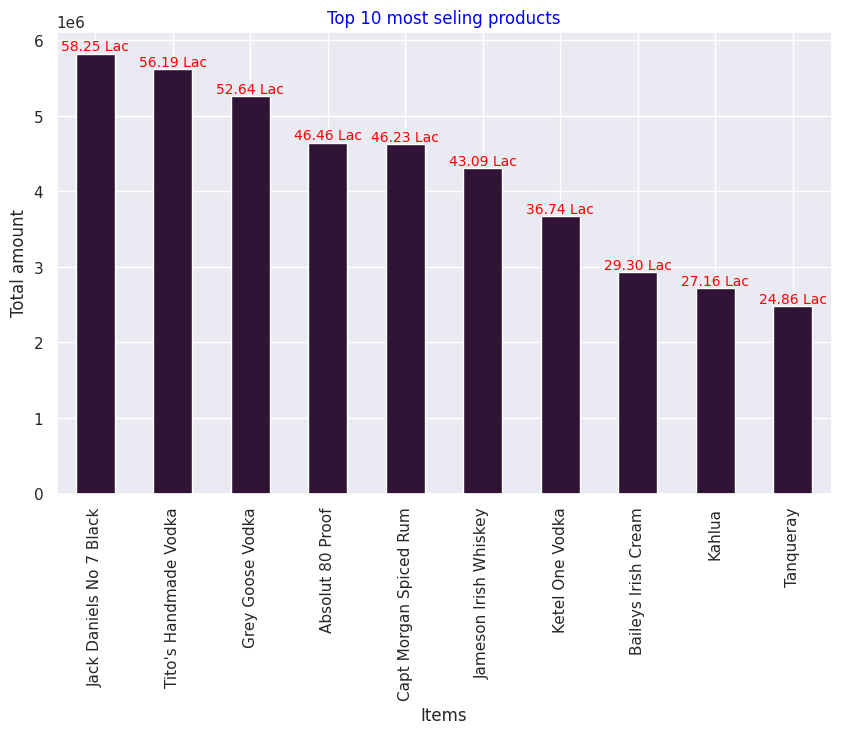

In [26]:
#Set the background theme
sns.set_theme(style='darkgrid')

# define the figuresize
plt.figure(figsize=(10,6))

# Calculate the top-10 products with their revenue
ax=final_purchase.groupby('Description')['Dollars'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='twilight_shifted_r')

# get the label axes in lac format
value=[p.get_height() for p in ax.patches]
ax.bar_label(ax.containers[0],labels=[f'{val/100000 :.2f} Lac' for val in value],fontsize=10,color='red')
ax.set_title('Top 10 most seling products',fontsize=12,color='blue')
ax.set_xlabel('Items')
ax.set_ylabel('Total amount')
plt.show()

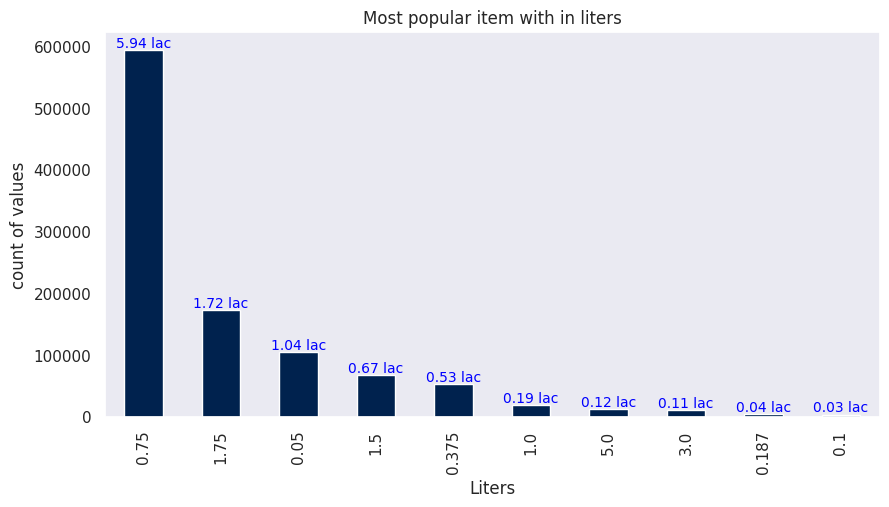

In [10]:
# Set the background theme
sns.set_theme(style='dark')

# define the figsize
plt.figure(figsize=(10,5))

# find the top_10 volume products in the data set.
ax=(sales_df['Volume']/1000).value_counts().sort_values(ascending=False).head(10).plot(kind='bar',colormap='cividis')

# to get the height of the labels
values=[value.get_height() for value in ax.patches]
ax.bar_label(ax.containers[0],labels=[f'{val/100000:.2f} lac' for val in values],fontsize=10,color='blue')

# set the title of the bar and define the xlabel and ylabel
ax.set_title('Most popular item with in liters')
ax.set_ylabel('count of values')
ax.set_xlabel('Liters')
plt.show()

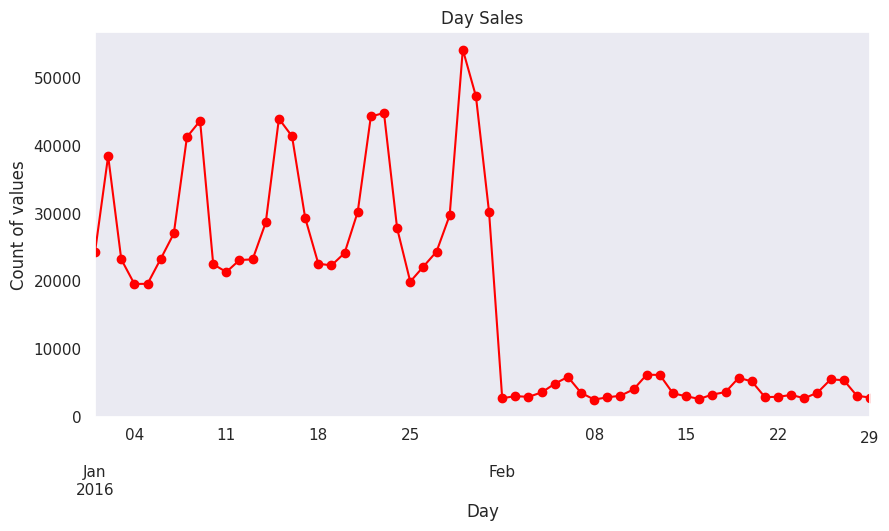

In [11]:
# Let's Create a chart to visualize the day sales in the sales dataframe
sales_df['SalesDate']=pd.to_datetime(sales_df['SalesDate'])
plt.figure(figsize=(10,5))
sales_df.resample('D',on='SalesDate').size().plot(kind='line',marker='o',color='red')
plt.title('Day Sales')
plt.xlabel('Day')
plt.ylabel('Count of values')
plt.show()

In [12]:
'''
Identify the top 10 vendors with payment delays by analysing the data. 
First, subtract the invoice date from the payment date to determine the number of days delayed. 
Then, apply the group by function to categorise the vendors based on their payment delays, 
using average values for the calculations.

'''
# define the separate columns and first convert the datetime format and subtract the values.
invoice_df['payment_delay']=(pd.to_datetime(invoice_df['PayDate'])-pd.to_datetime(invoice_df['InvoiceDate'])).dt.days


# Create a dataframe to find the top 10 vendors that should have delayed the payment.
top_10_vendor_with_payment_delay=(invoice_df.groupby('VendorName')['payment_delay']
                                  .mean()
                                  .sort_values(ascending=False)
                                  .head(10)
                                  .reset_index())
top_10_vendor_with_payment_delay=top_10_vendor_with_payment_delay.round(2)
top_10_vendor_with_payment_delay.style.format(
    {"payment_delay": "{:.2f}"}
).background_gradient(cmap='Pastel1_r')

,VendorName,payment_delay
0,AAPER ALCOHOL & CHEMICAL CO,43.00
1,LAUREATE IMPORTS CO,41.00
2,UNCORKED,39.71
3,GILMANTON WINERY & VINEYARD,39.50
4,VINEDREA WINES LLC,38.80
5,FLAVOR ESSENCE INC,38.00
6,MARTIGNETTI COMPANIES,37.89
7,ALISA CARR BEVERAGES,37.79
8,APPOLO VINEYARDS LLC,37.38
9,R.P.IMPORTS INC,37.19


## Visualize the revenue and profits of the top 10 vendors.

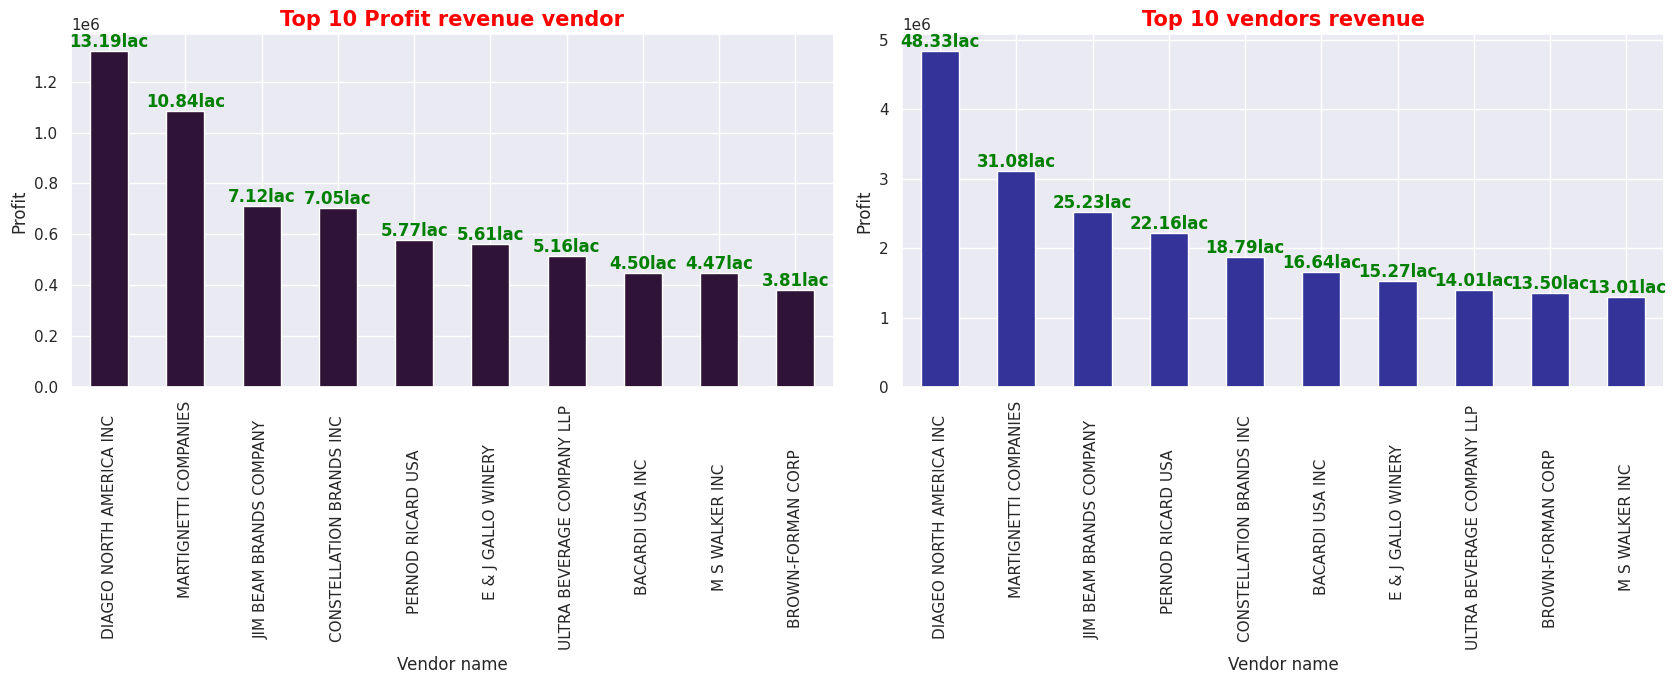

In [13]:

'''
Identify the top 10 vendors and their total profits. Create a separate data frame from the existing one, 
applying relevant formulas and adding new columns to clarify the values.
'''
# create the sub_dataframes using the dataframe
sample_1_df=sales_df[['Brand', 'VendorName','SalesQuantity']]
sample_2_df=purchase_df[['Brand', 'Price','PurchasePrice']]

# Merged the two dataframes 
merged_df_1=sample_1_df.merge(sample_2_df,on='Brand',how='left')

# To calculate the profit per unit, use the formula: Profit = Selling Price - Purchase Price.

merged_df_1['profit_per_unit']=merged_df_1['Price']- merged_df_1['PurchasePrice']

# To calculate the profit per unit, use the formula: Profit = Selling Price - Purchase Price
merged_df_1['total_profit']=merged_df_1['SalesQuantity'] * merged_df_1['profit_per_unit']

# Use the `groupby` function to aggregate the total profit by vendor name.
top_10_profit_vendor=merged_df_1.groupby('VendorName')['total_profit'].sum().sort_values(ascending=False).head(10)

# Please create a function to compare the company's revenue and profit.
def bar_plot(data,ax,title,xlabel,ylabel,color):
    
    # Set the theme colour
    sns.set_theme(style='darkgrid')
    
    # define the barplots with colourmap
    ax=data.plot(kind='bar',colormap=color,ax=ax)
    
    # labels in the bar in lac
    value=[p.get_height() for p in ax.patches]
    
    if ax.containers:
        ax.bar_label(ax.containers[0],labels=[f'{val/100000:.2f}lac' for val in value],fontsize=12,fontweight='bold',color='green')

    #title of barplot
    ax.set_title(title,fontsize=15,fontweight='bold',color='red')

    # set the xlabel
    ax.set_xlabel(xlabel)

    #set the ylabel
    ax.set_ylabel(ylabel)

# create a subplots
fig,axes=plt.subplots(1, 2, figsize=(17,7))
top_10_revenue_vendor=sales_df.groupby('VendorName')['SalesDollars'].sum()\
                        .sort_values(ascending=False).head(10)
bar_plot(top_10_profit_vendor, axes[0],'Top 10 Profit revenue vendor', 'Vendor name', 'Profit','twilight_shifted')
bar_plot(top_10_revenue_vendor, axes[1], 'Top 10 vendors revenue', 'Vendor name' ,'Profit','terrain')
plt.tight_layout()
plt.show()


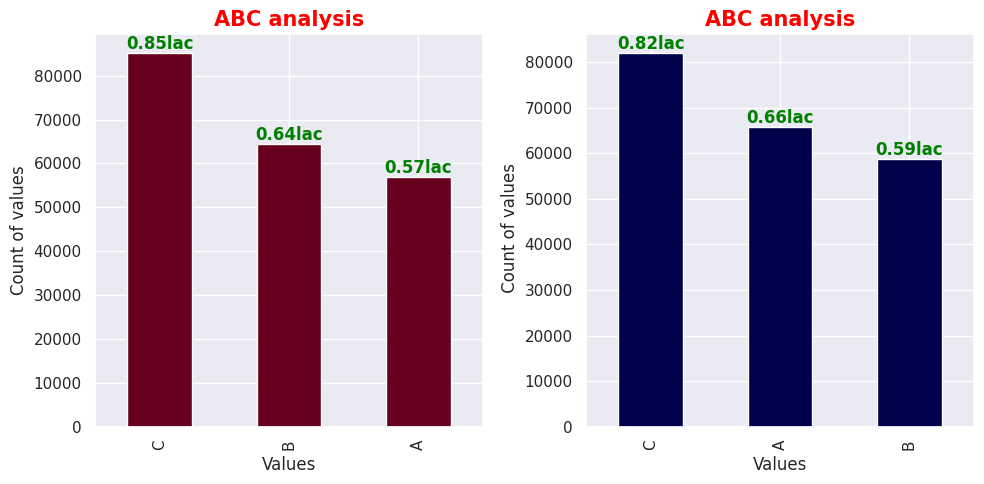

In [14]:
'''
To find the ABC inventory, I've created a separate DataFrame to represent the fully processed invoices.
First, I will multiply the on-hand quantity by the price to calculate the inventory value. Then, 
I will determine the percentage of each inventory item and sort the values in ascending order. 
Finally, I will calculate the cumulative values.
'''
# To calculate the inventory, we first multiply the price by the quantity on hand.
fully_invoice_df['invertory_x']=fully_invoice_df['onHand_x'] * fully_invoice_df['Price_x']
fully_invoice_df['invertory_y']=fully_invoice_df['onHand_y'] * fully_invoice_df['Price_y']

# Find the percentage of values
fully_invoice_df['percent_x'] = (fully_invoice_df['invertory_x'] / fully_invoice_df['invertory_x'].sum()) * 100
fully_invoice_df['percent_y'] = (fully_invoice_df['invertory_y'] / fully_invoice_df['invertory_y'].sum()) * 100

# Please sort the values in descending order based on their percentages, from highest to lowest.
fully_invoice_df = fully_invoice_df.sort_values('percent_x', ascending=False)
fully_invoice_df['cumulative_percent_x'] = fully_invoice_df['percent_x'].cumsum()

fully_invoice_df = fully_invoice_df.sort_values('percent_y', ascending=False)
fully_invoice_df['cumulative_percent_y'] = fully_invoice_df['percent_y'].cumsum()

# Define the function 
def abc_percentage(data):
    if data <=70:
        return 'A'
    elif data <=90:
        return 'B'
    else:
        return 'C'

# Apply the function in percentage columns
fully_invoice_df['cumulative_percent_x']=fully_invoice_df['cumulative_percent_x'].apply(abc_percentage)
fully_invoice_df['cumulative_percent_y']=fully_invoice_df['cumulative_percent_y'].apply(abc_percentage)

# Visualise the bar graph 
fig,axes=plt.subplots(1, 2, figsize=(10,5))
bar_plot(fully_invoice_df['cumulative_percent_x'].value_counts(), axes[0], 'ABC analysis', 'Values', 'Count of values', 'RdGy')
bar_plot(fully_invoice_df['cumulative_percent_y'].value_counts(), axes[1], 'ABC analysis', 'Values',' Count of values', 'seismic')
plt.tight_layout()
plt.show()

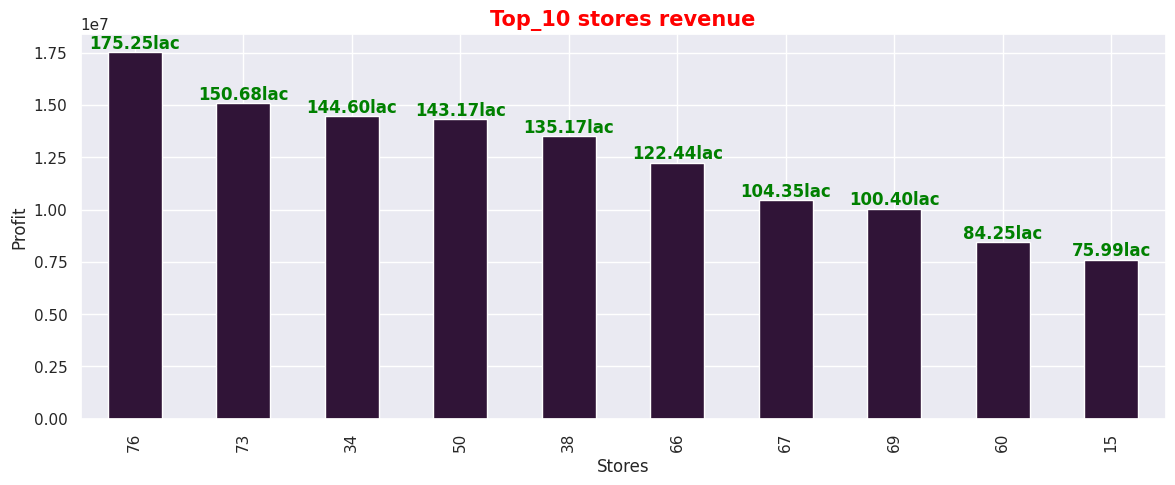

In [15]:
# Please create a bar chart to visualize the top 10 stores by revenue
top_10_stores=final_purchase.groupby('Store')['Dollars'].sum().sort_values(ascending=False).head(10)
fig,axes=plt.subplots(1,1,figsize=(14,5))
bar_plot(top_10_stores, axes, 'Top_10 stores revenue', 'Stores', 'Profit', 'twilight_shifted')

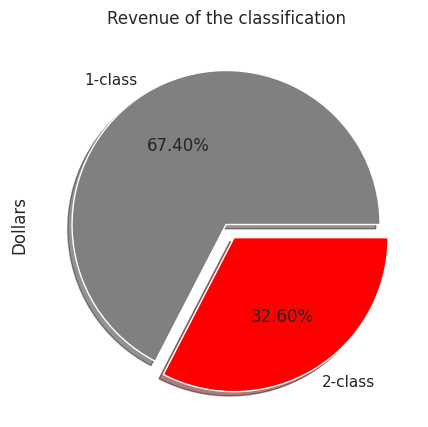

In [16]:
# Revenue of the classification report
final_purchase.groupby('Classification')['Dollars'].sum().sort_values(ascending=False)\
.plot(kind='pie',figsize=(10,5),
    explode=[0,0.1],
    labels=['1-class','2-class'],
    colors=['gray','red'],
    autopct='%1.2f%%',
    shadow=True)
plt.title('Revenue of the classification')
plt.show()

## 

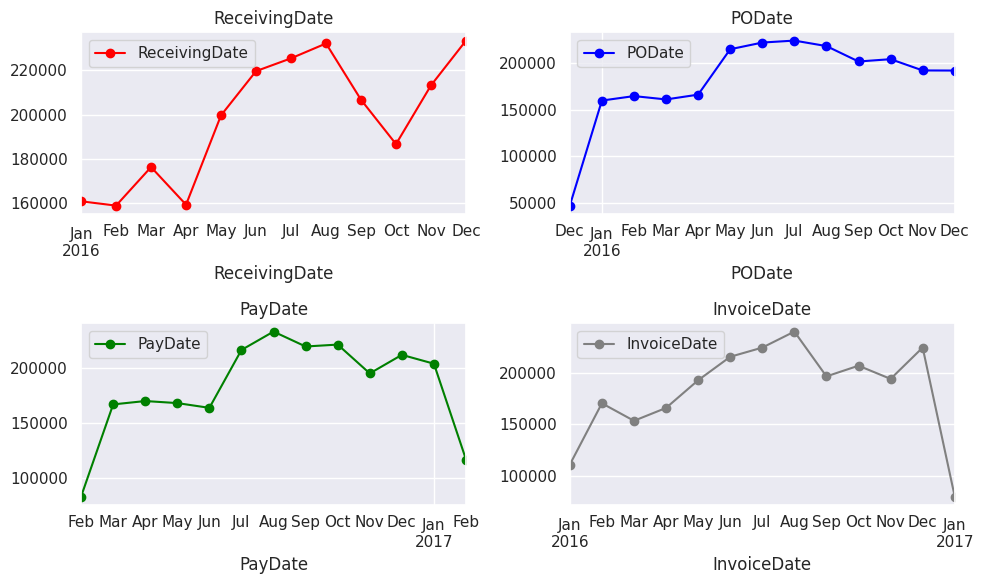

In [18]:
'''
Create line charts to analyse the monthly data, 
including invoice data, pod date, and pay date. We will visualise the graphs separately.
'''

# create the list to store the time columns
date_time=['ReceivingDate','PODate', 'PayDate','InvoiceDate']
# convert the columns in to datetime format.
for col in date_time:
    final_purchase[col]=pd.to_datetime(final_purchase[col])
# create subplots 
fig,axes=plt.subplots(2,2,figsize=(10,6))
# first plot with receiving date
final_purchase.resample('M',on='ReceivingDate').size().plot(kind='line',marker='o',ax=axes[0,0],color='red',label='ReceivingDate')
axes[0,0].set_title('ReceivingDate')
axes[0,0].legend()

# Second chart on the Pod date
final_purchase.resample('m',on='PODate').size().plot(kind='line',ax=axes[0,1],marker='o',color='blue',label='PODate')
axes[0,1].set_title('PODate')
axes[0,1].legend()

# Third chart on Paydate
final_purchase.resample('M',on='PayDate').size().plot(kind='line',ax=axes[1,0],marker='o',color='green',label='PayDate')
axes[1,0].set_title('PayDate')
axes[1,0].legend()

# fourth chart will be invoicedate
final_purchase.resample('M',on='InvoiceDate').size().plot(kind='line',ax=axes[1,1],marker='o',color='gray',label='InvoiceDate')
axes[1,1].set_title('InvoiceDate')
axes[1,1].legend()
plt.tight_layout()
plt.show()

## Calculate the average number of days vendors receive payment after they book an order and when they generate the invoice.

In [19]:
'''
In this section, we address two tasks:

**Task 1:** Calculate the average number of days from the date the vendor was given the order to the date the order was received.

**Task 2:** Determine the average number of days taken to pay the invoice after the product is received.

'''
# We will create a separate column for the customer pod date and the receiving date.
final_purchase['pod_receing_days']=(pd.to_datetime(final_purchase['ReceivingDate'])-pd.to_datetime(final_purchase['PODate'])).dt.days

#We will create a separate column for the customer invoice date and the pay date.

final_purchase['pay_invoice_days']=(pd.to_datetime(final_purchase['PayDate'])-pd.to_datetime(final_purchase['InvoiceDate'])).dt.days

# Groupby with vendorname
task_1=pd.DataFrame(final_purchase.groupby('VendorName')['pod_receing_days'].mean().
                    sort_values(ascending=False)
                    .head(10)
                    .round(1)
                    .reset_index(name='Vendor_reciving_days_after_order')
                   )
task_2=pd.DataFrame(final_purchase.groupby('VendorName')['pay_invoice_days'].mean()
                    .sort_values(ascending=False)
                    .head(10)
                    .round(1)
                   .reset_index(name='Venodr_pay_the_amount_after_reciving_order'))
#We want to display the two tasks in a single dataframe. We have some null values, but we will fill them in to clarify our understanding
merged_tasks=pd.merge(task_1, task_2, on='VendorName', how='outer')
merged_tasks.fillna(0).style.format({
    'Vendor_reciving_days_after_order': "{:.2f}",
    'Venodr_pay_the_amount_after_reciving_order':"{:.2f}"}
).background_gradient(cmap='nipy_spectral')

,VendorName,Vendor_reciving_days_after_order,Venodr_pay_the_amount_after_reciving_order
0,AAPER ALCOHOL & CHEMICAL CO,10.00,44.00
1,ALISA CARR BEVERAGES,0.00,39.60
2,AMERICAN SPIRITS EXCHANGE,0.00,37.80
3,BLACK COVE BEVERAGES,9.30,0.00
4,FLAVOR ESSENCE INC,13.00,38.00
5,GILMANTON WINERY & VINEYARD,0.00,40.30
6,"IRA GOLDMAN AND WILLIAMS, LLP",9.60,0.00
7,LAUREATE IMPORTS CO,10.00,41.00
8,LOYAL DOG WINERY,0.00,42.10
9,MARTIGNETTI COMPANIES,0.00,39.00


# Reorder Point Analysis
### Mathematical formulas.
* > Daily_Demand = (Quantity/365)
* > Safety Stock=Daily Demand×Waiting Days×0.20
* > Reorder Point=(Daily Demand×Waiting Days)+Safety Stock

In [20]:
# Aggregate the yearly demand
yearly_demand=final_purchase.groupby('Brand')['Quantity'].sum().sort_values(ascending=False).reset_index()

# Find the average waiting days after booking the order
average_waiting=final_purchase.groupby('Brand')['pod_receing_days'].mean().reset_index()
average_waiting.rename(columns={'pod_receing_days':'Waiting_days'},inplace=True)
# merge the two dataframes
merged_df2=pd.merge(yearly_demand,average_waiting,on='Brand')

# Calculate the daily demands formula is Quantity/365 days
merged_df2['Daily_demands']=(merged_df2['Quantity']/365).round(1)

# Calculate the safety stock 
# formula is : Safety Stock=Daily Demand×Waiting Days×0.15(assuming20)
merged_df2['Safety_stock']=(merged_df2['Daily_demands']*merged_df2['Waiting_days']*0.15).round(0)

# Calculate the reorder points 
# formula is : Reorder Point=(Daily Demand×Waiting Days)+Safety Stock
merged_df2['reorder_point']=(merged_df2['Daily_demands']*merged_df2['Waiting_days']+merged_df2['Safety_stock']).round(0)

# Remove duplicate values in the dataframe to prevent repetition when merging.
start_unique = start_invoice[['Brand','onHand']].drop_duplicates(subset='Brand', keep='last')

# Merging the dataframes
rop_invetory=merged_df2.merge(start_unique,on='Brand',how='left')

# Create new columns and apply the condition: if onhand is less than reorder_point, return "yes"; otherwise, return "no."
rop_invetory['onHand'] = rop_invetory['onHand'].fillna(0)
rop_invetory['New_record']=np.where(rop_invetory['onHand'] <= rop_invetory['reorder_point'], "Yes", "No")
rop_invetory.head()

,Brand,Quantity,Waiting_days,Daily_demands,Safety_stock,reorder_point,onHand,New_record
0,8111,337660,7.619963,925.1,1057.0,8106.0,160.0,Yes
1,1892,254824,7.678691,698.1,804.0,6164.0,90.0,Yes
2,5111,244654,7.549521,670.3,759.0,5819.0,294.0,Yes
3,3606,226085,7.696203,619.4,715.0,5482.0,158.0,Yes
4,6570,215668,7.081717,590.9,628.0,4813.0,250.0,Yes


## Economic Order Quantity (EOQ) Analysis:
* D = Annual_oders
* S= Order_cost
* H= Holding_cost
* > Formula is : √(2 × D × S) / H

In [21]:
# Annual demand for the brand.
yearly_demands=final_purchase.groupby('Brand')['Quantity'].sum().reset_index()
yearly_demands.rename(columns={'Quantity': 'AnnualDemand'},inplace=True)

#Average price for each brand.
avg_brand=final_purchase.groupby('Brand')['PurchasePrice'].mean().reset_index()

# Merged the dataframe
df_merged_1=pd.merge(yearly_demands,avg_brand,on='Brand')

# Assume define the two variables my assumption values we can change it also
cost_per_order=200
holding_cost_per_order=0.15

# Add the new columns
df_merged_1['Holdingcost']=df_merged_1['PurchasePrice']* holding_cost_per_order

# To calculate the Economic Order Quantity (EOQ) using the formula, use the following equation: 

# EOQ = √(2 × Annual Demand × Cost per Order) / Holding Cost.

df_merged_1['EOQ']=np.sqrt((2* df_merged_1['AnnualDemand'] * cost_per_order)/ df_merged_1['Holdingcost']).round(1)

# Number of orders by year. formula : annual_demand / Eoq
df_merged_1['Yearly_orders']=(df_merged_1['AnnualDemand']/ df_merged_1['EOQ']).round(1)

# JIT Suggestion using lead time consistency (pod_receiving_days)
lead_time = final_purchase.groupby('Brand')['pod_receing_days'].mean().reset_index()
df_merged_1 = pd.merge(df_merged_1, lead_time, on='Brand')

# Smaller batch (25% of EOQ) → JIT model
# We are using 0.25 because I found it to be the smallest unit. 
# We can add 50 and 70, but in that case, we get a higher JIT, so I chose the smaller one.

df_merged_1['JIT_Order_Qty'] = (df_merged_1['EOQ'] * 0.25).round(0)

df_merged_1.head()

,Brand,AnnualDemand,PurchasePrice,Holdingcost,EOQ,Yearly_orders,pod_receing_days,JIT_Order_Qty
0,58,3550,9.28,1.3920,1010.0,3.5,7.758389,252.0
1,60,1633,7.40,1.1100,767.1,2.1,7.659794,192.0
2,61,312,10.60,1.5900,280.2,1.1,8.115385,70.0
3,62,3200,28.67,4.3005,545.6,5.9,7.331570,136.0
4,63,2855,30.46,4.5690,499.9,5.7,7.324427,125.0


## About insight into the data:
* Diango, a North American company, reports that both tables lead in revenue and profit, indicating strong vendor performance. It is important to value this vendor in order to avoid stock shortages. By providing adequate stock from such vendors, we can boost our business sales.

* Capt Morgan Spiced Rum has emerged as the leading revenue generator in our data, so we need to increase stock for this product. Understanding the factors contributing to this revenue in our sales data is crucial.

* In the purchase group, most of the revenue is generated from Jack Daniel's No. 7 Black. We observed two key points in sales: first, the major business success stems from Captain Morgan Spiced Rum, which generates high revenue. Additionally, the Jack Daniel's brand earns significant profit due to the large number of purchases.